# Machine Learning - Homework 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(100)

### Definition of functions

Function that outputs the given a vector of weights.

In [2]:
limit_high = 10000
limit_low = -10000

def f(x, w):
    res = np.sign(np.dot(x, w))
    if res >= 0:
        return np.append(x, 1)
    else:
        return np.append(x, -1)

Function that generates a number N of samples of a certain dimension d.

In [3]:
def gen_random_samples(d, N):
    return np.array([np.append(1, np.random.uniform(limit_low, limit_high, d)) for _ in range(0, N)])

For a 2 dimension vector, compute the y for an x given that represents the line.

In [4]:
def get_points_given_vector(x, v):
    assert(len(v) == 3)
    C, A, B = v[:]
    # of the shape w0 + w1 x1 + w2 x2 = 0
    # therefore x2 = (- w1 x1 - w0) / w2
    y = (-A*x - C) / B
    return y

Define the PLA generalized for a number of dimnension d.

In [5]:
def perceptron_learning_algorithm(samples_with_label, d):
    w = np.random.uniform(-1, 1, d+1)
    features = np.array([item[:-1] for item in samples_with_label])
    labels = np.array([int(item[-1]) for item in samples_with_label])
        
    count = 0
    errors = None
    
    while errors is None or errors > 0:
        count+=1
        result = np.array([], dtype=int)
        for index in range(0, len(samples_with_label)):
            result = np.append(result, int(np.sign(np.inner(w, features[index]))))
        
        classification_results = result*labels
        errors = -1 * np.sum(classification_results[classification_results == -1])

        if errors > 0:
            target_index = classification_results.tolist().index(-1)
            w = w + labels[target_index] * features[target_index]
     
    return w, count

### Section a)
**Generate a dataset of size 20. Plot the examples $\{(x_n,y_n)\}$ as well as the target function f on a plane.**

In [6]:
d = 2      # n-Dimension
N = 20     # Number of samples

In [7]:
no_label_samples = gen_random_samples(d, N)
v = [0, 1, -1]

In [8]:
labeled_samples = np.array([f(sample, np.array(v)) for sample in no_label_samples])

In [9]:
# Get the samples in a format easy to represent in a plot
pos_samples = np.array([(item[1], item[2]) for item in labeled_samples if item[-1] == 1])
neg_samples = np.array([(item[1], item[2]) for item in labeled_samples if item[-1] == -1])
pos_samples_x = [item[0] for item in pos_samples]
pos_samples_y = [item[1] for item in pos_samples]
neg_samples_x = [item[0] for item in neg_samples]
neg_samples_y = [item[1] for item in neg_samples]

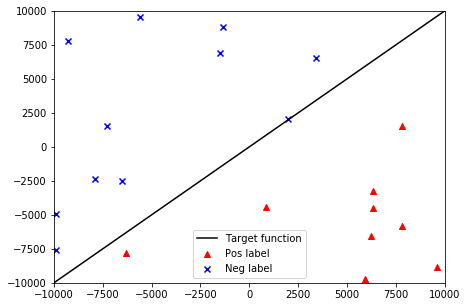

In [10]:
plt.figure(figsize=(7,5))
line_x = np.arange(limit_low,limit_high+1,1)
line_y = np.array([get_points_given_vector(i, np.array(v)) for i in np.arange(limit_low,limit_high+1,1)])
# Plot the example
plt.xlim([limit_low,limit_high])
plt.ylim([limit_low,limit_high])
plt.scatter(pos_samples_x, pos_samples_y, marker="^", color='red')
plt.scatter(neg_samples_x, neg_samples_y, marker='x', color='blue')
plt.plot(line_x, line_y, color='black')
plt.legend(['Target function', 'Pos label', 'Neg label'])
plt.show()

### Section b)
**Run the perceptron algorithm on the dataset. Report the number of updates that the algorithm takes before converging. Plot the examples $\{(x_n , y_n)\}$, the target function f, and the final hypothesis g in the same figure.**

In [11]:
h, number_of_cycles = perceptron_learning_algorithm(labeled_samples, d)
print('Hypothesis', h)
print('Number of cycles', number_of_cycles)

Hypothesis [-3.51504062e+00  1.65502657e+04 -1.58827710e+04]
Number of cycles 13


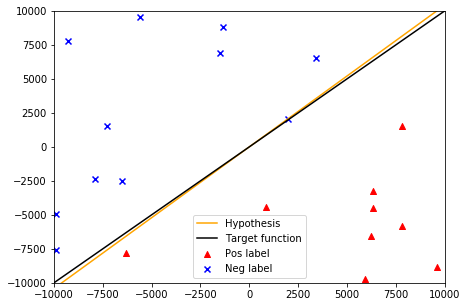

In [12]:
pos_samples = np.array([(item[1], item[2]) for item in labeled_samples if item[-1] == 1])
neg_samples = np.array([(item[1], item[2]) for item in labeled_samples if item[-1] == -1])
pos_samples_x = [item[0] for item in pos_samples]
pos_samples_y = [item[1] for item in pos_samples]
neg_samples_x = [item[0] for item in neg_samples]
neg_samples_y = [item[1] for item in neg_samples]
hyp_x = np.arange(limit_low,limit_high+1,1)
hyp_y = np.array([get_points_given_vector(i, np.array(h)) for i in np.arange(limit_low,limit_high+1,1)])
# Plot the example
plt.figure(figsize=(7,5))
plt.title('')
plt.xlim([limit_low,limit_high])
plt.ylim([limit_low,limit_high])
plt.scatter(pos_samples_x, pos_samples_y, marker="^", color='red')
plt.scatter(neg_samples_x, neg_samples_y, marker='x', color='blue')
plt.plot(hyp_x, hyp_y, color='orange')
plt.plot(line_x, line_y, color='black')
plt.legend(['Hypothesis', 'Target function', 'Pos label', 'Neg label'])
plt.show()

### Section c)
**Repeat everything in b) with another randomly generated dataset of size 20, and compare the result to b).**

Hypothesis [-4.01568393e+00  1.03469279e+04 -8.66612863e+03]
Number of cycles 6


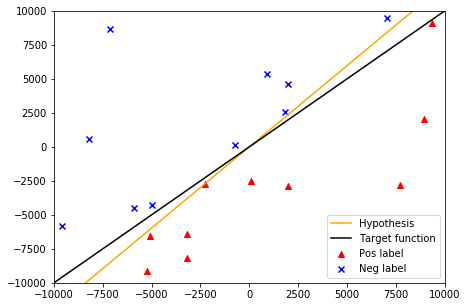

In [13]:
d = 2      # n-Dimension
N = 20

no_label_samples = gen_random_samples(d, N)

labeled_samples = np.array([f(sample, np.array(v)) for sample in no_label_samples])

h, number_of_cycles = perceptron_learning_algorithm(labeled_samples, d)
print('Hypothesis', h)
print('Number of cycles', number_of_cycles)

pos_samples = np.array([(item[1], item[2]) for item in labeled_samples if item[-1] == 1])
neg_samples = np.array([(item[1], item[2]) for item in labeled_samples if item[-1] == -1])
pos_samples_x = [item[0] for item in pos_samples]
pos_samples_y = [item[1] for item in pos_samples]
neg_samples_x = [item[0] for item in neg_samples]
neg_samples_y = [item[1] for item in neg_samples]

hyp_x = np.arange(limit_low,limit_high+1,1)
hyp_y = np.array([get_points_given_vector(i, np.array(h)) for i in np.arange(limit_low,limit_high+1,1)])
# Plot the example
plt.figure(figsize=(7,5))
plt.title('')
plt.xlim([limit_low,limit_high])
plt.ylim([limit_low,limit_high])
plt.scatter(pos_samples_x, pos_samples_y, marker="^", color='red')
plt.scatter(neg_samples_x, neg_samples_y, marker='x', color='blue')
plt.plot(hyp_x, hyp_y, color='orange')
plt.plot(line_x, line_y, color='black')
plt.legend(['Hypothesis', 'Target function', 'Pos label', 'Neg label'])
plt.show()

### Section d) 
**Repeat everything in b) with another randomly generated dataset of size 100, and compare the result to b).**

Hypothesis [  -164.72696592  70249.69731276 -70699.52268024]
Number of cycles 440


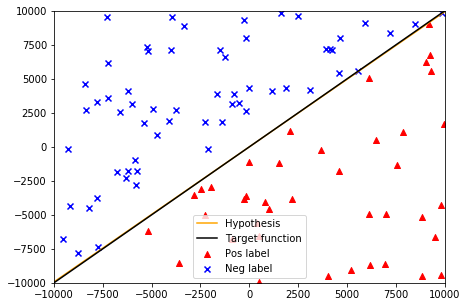

In [14]:
d = 2      # n-Dimension
N = 100

no_label_samples = gen_random_samples(d, N)

labeled_samples = np.array([f(sample, np.array(v)) for sample in no_label_samples])

h, number_of_cycles = perceptron_learning_algorithm(labeled_samples, d)
print('Hypothesis', h)
print('Number of cycles', number_of_cycles)

pos_samples = np.array([(item[1], item[2]) for item in labeled_samples if item[-1] == 1])
neg_samples = np.array([(item[1], item[2]) for item in labeled_samples if item[-1] == -1])
pos_samples_x = [item[0] for item in pos_samples]
pos_samples_y = [item[1] for item in pos_samples]
neg_samples_x = [item[0] for item in neg_samples]
neg_samples_y = [item[1] for item in neg_samples]

hyp_x = np.arange(limit_low,limit_high+1,1)
hyp_y = np.array([get_points_given_vector(i, np.array(h)) for i in np.arange(limit_low,limit_high+1,1)])
# Plot the example
plt.figure(figsize=(7,5))
plt.title('')
plt.xlim([limit_low,limit_high])
plt.ylim([limit_low,limit_high])
plt.scatter(pos_samples_x, pos_samples_y, marker="^", color='red')
plt.scatter(neg_samples_x, neg_samples_y, marker='x', color='blue')
plt.plot(hyp_x, hyp_y, color='orange')
plt.plot(line_x, line_y, color='black')
plt.legend(['Hypothesis', 'Target function', 'Pos label', 'Neg label'])
plt.show()

### Section e)
**Repeat everything in b) with another randomly generated dataset of size 1000, and compare the result to b).**

Hypothesis [-2.88659047e+00  3.96206619e+04 -3.95687313e+04]
Number of cycles 65


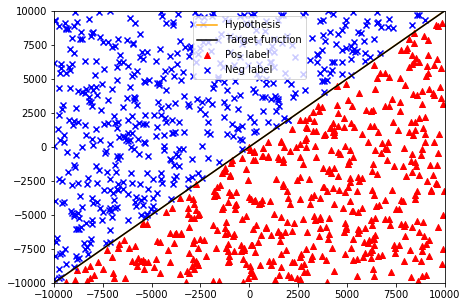

In [15]:
d = 2      # n-Dimension
N = 1000

no_label_samples = gen_random_samples(d, N)

labeled_samples = np.array([f(sample, np.array(v)) for sample in no_label_samples])

h, number_of_cycles = perceptron_learning_algorithm(labeled_samples, d)
print('Hypothesis', h)
print('Number of cycles', number_of_cycles)

pos_samples = np.array([(item[1], item[2]) for item in labeled_samples if item[-1] == 1])
neg_samples = np.array([(item[1], item[2]) for item in labeled_samples if item[-1] == -1])
pos_samples_x = [item[0] for item in pos_samples]
pos_samples_y = [item[1] for item in pos_samples]
neg_samples_x = [item[0] for item in neg_samples]
neg_samples_y = [item[1] for item in neg_samples]

hyp_x = np.arange(limit_low,limit_high+1,1)
hyp_y = np.array([get_points_given_vector(i, np.array(h)) for i in np.arange(limit_low,limit_high+1,1)])
# Plot the example
plt.figure(figsize=(7,5))
plt.title('')
plt.xlim([limit_low,limit_high])
plt.ylim([limit_low,limit_high])
plt.scatter(pos_samples_x, pos_samples_y, marker="^", color='red')
plt.scatter(neg_samples_x, neg_samples_y, marker='x', color='blue')
plt.plot(hyp_x, hyp_y, color='orange')
plt.plot(line_x, line_y, color='black')
plt.legend(['Hypothesis', 'Target function', 'Pos label', 'Neg label'])
plt.show()

### Section f)
**Modify the experiment such that $x_n ∈ R^{10}$ instead of R . Run the algorithm
on a randomly generated dataset of size 1000. How many updates does the algorithm take to converge?**

In [16]:
d = 10      # n-Dimension
N = 1000
no_label_samples = gen_random_samples(d, N)
v = [0] + [1 for _ in range(0, 10)]

labeled_samples = np.array([f(sample, np.array(v)) for sample in no_label_samples])

h, number_of_cycles = perceptron_learning_algorithm(labeled_samples, d)
print('Hypothesis', h)
print('Number of cycles', number_of_cycles)

Hypothesis [ -5210.50421348 447152.41098943 433471.28056369 432817.93785149
 451618.58620438 436376.81808058 426867.88350097 446452.62839873
 445598.12478179 448067.92287491 442902.6598345 ]
Number of cycles 10671


### Section g)
**Summarize your conclusions regarding the accuracy and running time of the algorithm as a function of N (the number of data points) and d (the number of dimensions).**

It can be easily concluded after sections a-f that the accuracy (in terms of similarity of the hypothesis to the target function) increases as the number of samples increases when the number of dimensions is kept fixed. As for the running time, it is obvious to claim that it increases as both dimensions and number of samples increase.

In this context and using the big-O notation we can define running time and accuracy as function of N (# of samples) and d (data dimension), the running-time of the algorithm is O(d·N), it increases when both dimension and number of samples increase. While the accuracy could be expressed in terms of $O(Nd)$, this expression reflects that as the number of samples increases the accuracy increases, but as the number of dimension increases the accuracy decreases.